# COMP 352 Final Project - Blackjack

**Authors:** Joe Cox, Augusto Escudero, Hreinson Vanover

**Date:** 12/15/2024

## Table of Contents:
* [Data Importing and Pre-processing](#data-importing)
* [Data Analysis and Visualization](#data-vis)
* [Data Analytics](#data-analytics)

## Data Importing and Pre-processing <a class="anchor" id="data-importing"></a>

In [2]:
# Import needed libraries
import pandas as pd
from pandas import DataFrame

import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

In [3]:
# Read in csv file
# Using local file instead of uploading to repository
# Size is 3.63GB

# Import dataset into Pandas DataFrame
entire_blackjack_df = pd.read_csv("blackjack_simulator.csv", nrows=1000000)


In [5]:
# Describing characteristics

blackjack_df = entire_blackjack_df

print("Dataset shape (rows, columns): ", blackjack_df.shape)

numerical_columns = blackjack_df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = blackjack_df.select_dtypes(include=['object', 'category']).columns

print('\nColumn types:')
print('---'*3)
print('Number of numerical variables: ', len(numerical_columns))
print('Number of categorical variables: ', len(categorical_columns))
print('---'*3)

print("\nData types: ")
print("---"*3)
print(blackjack_df.dtypes)

Dataset shape (rows, columns):  (1000000, 12)

Column types:
---------
Number of numerical variables:  6
Number of categorical variables:  6
---------

Data types: 
---------
shoe_id                 int64
cards_remaining         int64
dealer_up               int64
initial_hand           object
dealer_final           object
dealer_final_value     object
player_final           object
player_final_value     object
actions_taken          object
run_count               int64
true_count              int64
win                   float64
dtype: object


In [7]:
# Check column names
blackjack_df.columns

Index(['shoe_id', 'cards_remaining', 'dealer_up', 'initial_hand',
       'dealer_final', 'dealer_final_value', 'player_final',
       'player_final_value', 'actions_taken', 'run_count', 'true_count',
       'win'],
      dtype='object')

In [8]:
blackjack_df.head()

,shoe_id,cards_remaining,dealer_up,initial_hand,dealer_final,dealer_final_value,player_final,player_final_value,actions_taken,run_count,true_count,win
0,0,416,10,"[10, 11]","[10, 4, 10]",24,"[[10, 11]]",['BJ'],[['S']],1,0,1.5
1,0,411,10,"[5, 5]","[10, 8]",18,"[[5, 5, 11]]",[21],"[['H', 'S']]",-2,0,1.0
2,0,406,6,"[3, 10]","[6, 6, 10]",22,"[[3, 10]]",[13],[['S']],-2,0,1.0
3,0,401,10,"[5, 9]","[10, 8]",18,"[[5, 9, 11, 3]]",[18],"[['H', 'H', 'S']]",-1,0,0.0
4,0,395,8,"[6, 10]","[8, 2, 10]",20,"[[6, 10, 10]]",[26],[['H']],-1,0,-1.0


### Handling missing data

In [9]:
total = blackjack_df.isnull().sum().sort_values(ascending=False)
percent = (blackjack_df.isnull().sum() / blackjack_df.isnull().count()).sort_values(
    ascending=False
)

missing_data = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
missing_data.head(20)

,Total,Percent
shoe_id,0,0.0
cards_remaining,0,0.0
dealer_up,0,0.0
initial_hand,0,0.0
dealer_final,0,0.0
dealer_final_value,0,0.0
player_final,0,0.0
player_final_value,0,0.0
actions_taken,0,0.0
run_count,0,0.0


In [ ]:
# Note that there is no missing data

In [50]:
# Create a mapping dictionary
# S = Stand , H = Hit , D = Double , P = Split , R = Surrender , I = Insurance , N = No Insurance, ] = No move(dealer had BJ)
mapping = {'S': 0, 'H': 1, 'D': 2, 'P': 3, 'R': 4, 'I': 5, 'N': 6, ']': 7}

# Apply mapping to the column
blackjack_df['first_move'] = blackjack_df['actions_taken'].str[3].map(mapping)

check_df = blackjack_df[["actions_taken", "first_move"]]
print(check_df.head)

<bound method NDFrame.head of             actions_taken  first_move
0                 [['S']]           0
1            [['H', 'S']]           1
2                 [['S']]           0
3       [['H', 'H', 'S']]           1
4                 [['H']]           1
...                   ...         ...
999995  [['H', 'H', 'S']]           1
999996            [['S']]           0
999997       [['H', 'S']]           1
999998            [['S']]           0
999999  [['H', 'H', 'S']]           1

[1000000 rows x 2 columns]>


In [51]:
items = blackjack_df['initial_hand']
item = items[0]
print(items)

print(type(item))

blackjack_df[['left_number', 'right_number']] = blackjack_df['initial_hand'].str.strip('[]').str.split(', ', expand=True).astype(int)

0         [10, 11]
1           [5, 5]
2          [3, 10]
3           [5, 9]
4          [6, 10]
            ...   
999995      [3, 2]
999996     [7, 10]
999997      [3, 2]
999998     [9, 10]
999999     [11, 4]
Name: initial_hand, Length: 1000000, dtype: object
<class 'str'>


In [66]:
# Define conditions and choices
conditions = [
    blackjack_df['win'] > 0,
    blackjack_df['win'] < 0,
    blackjack_df['win'] == 0
]
choices = [1, -1, 0]

# Apply the conditions to create a new column
blackjack_df['win_encoded'] = np.select(conditions, choices)

In [67]:
# remove unnecessary columns
filtered_blackjack_df = blackjack_df.drop(columns=["shoe_id", "cards_remaining", "dealer_final", "dealer_final_value", "player_final", "player_final_value", "actions_taken", "run_count", "true_count", 'initial_hand'])

na_columns_count = filtered_blackjack_df.isnull().any().sum()
print(na_columns_count)

rows_with_na = filtered_blackjack_df[filtered_blackjack_df.isnull().any(axis=1)]
print(rows_with_na)

0
Empty DataFrame
Columns: [dealer_up, win, first_move, left_number, right_number, win_encoded]
Index: []


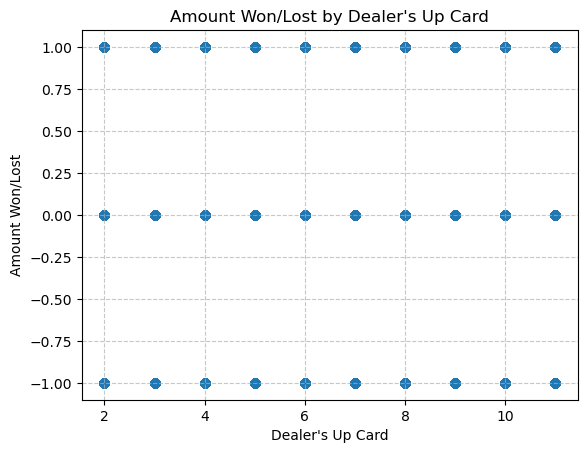

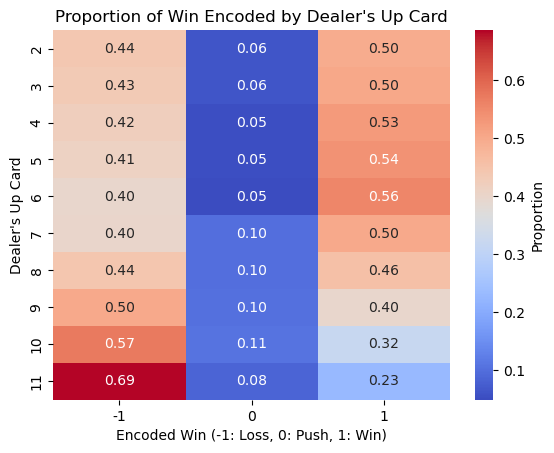

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(x=filtered_blackjack_df['dealer_up'], y=filtered_blackjack_df['win_encoded'], alpha=0.5)
plt.title("Amount Won/Lost by Dealer's Up Card")
plt.ylabel("Amount Won/Lost")
plt.xlabel("Dealer's Up Card")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Calculate proportions of win_encoded for each dealer_up
heatmap_data = (
    filtered_blackjack_df
    .groupby('dealer_up')['win_encoded']
    .value_counts(normalize=True)
    .unstack()
)

sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Proportion'})
plt.title("Proportion of Win Encoded by Dealer's Up Card")
plt.ylabel("Dealer's Up Card")
plt.xlabel("Encoded Win (-1: Loss, 0: Push, 1: Win)")
plt.show()


<Axes: >

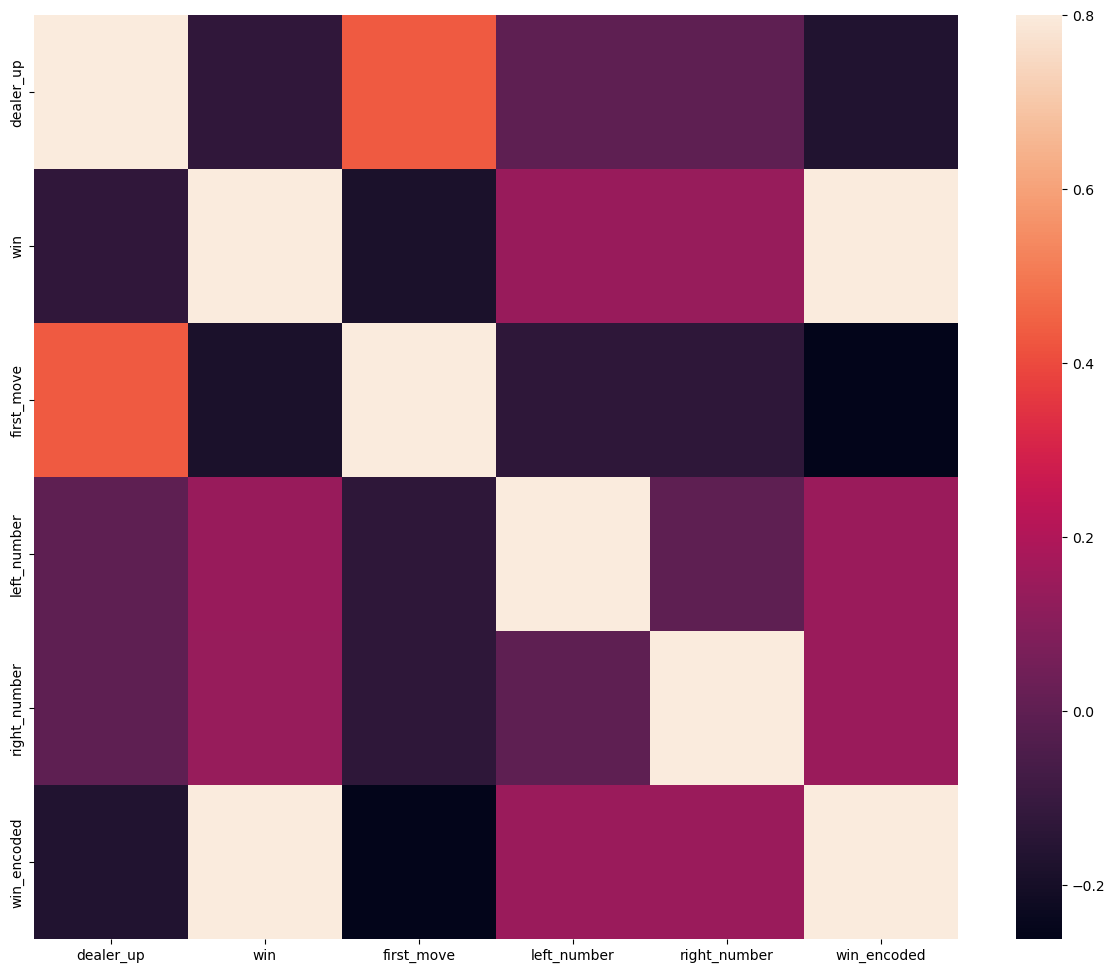

In [72]:
corrmat = filtered_blackjack_df.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=0.8, square=True)

## Data Analysis and Visualization <a class="anchor" id="data-vis"></a>

## Data Analytics <a class="anchor" id="data-analytics"></a>